<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1846 non-null   datetime64[ns]
 1   open_x     1846 non-null   float64       
 2   high_x     1846 non-null   float64       
 3   low_x      1846 non-null   float64       
 4   close_x    1846 non-null   float64       
 5   volume_x   1846 non-null   int64         
 6   average_x  1846 non-null   float64       
 7   open_y     1846 non-null   float64       
 8   high_y     1846 non-null   float64       
 9   low_y      1846 non-null   float64       
 10  close_y    1846 non-null   float64       
 11  volume_y   1846 non-null   int64         
 12  average_y  1846 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 187.6 KB


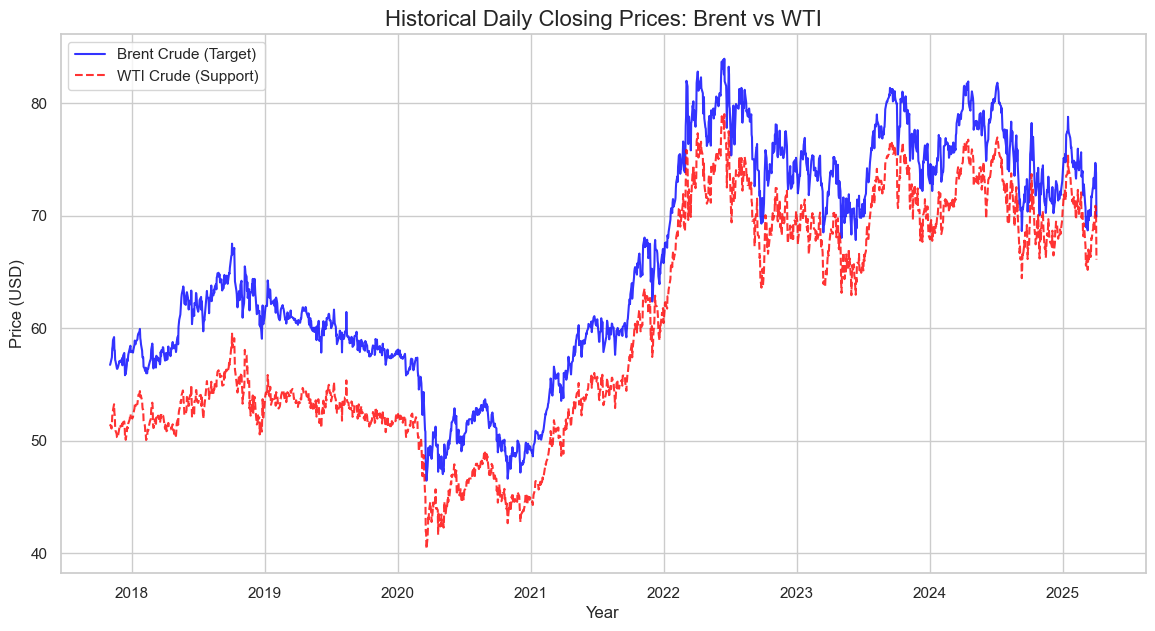

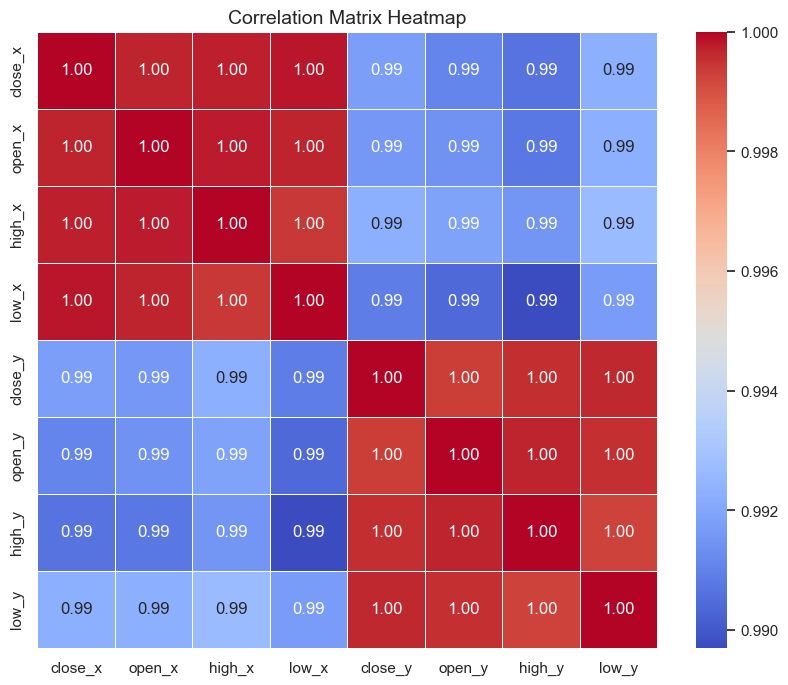

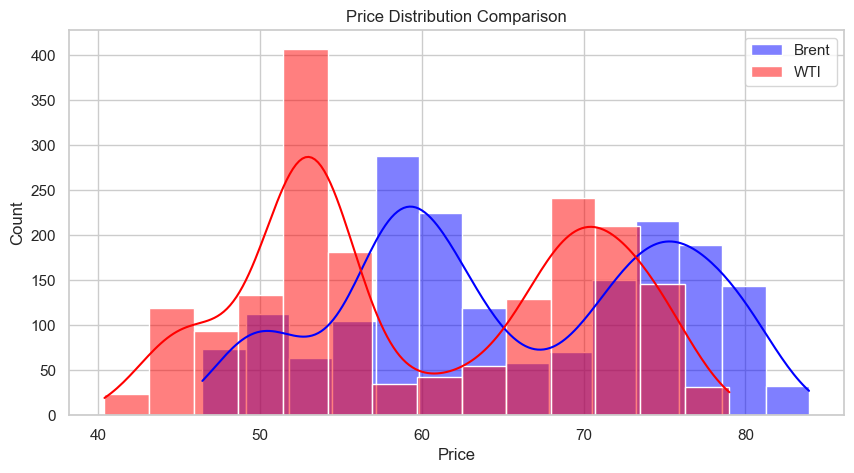

In [1]:
# # 📊 Exploratory Data Analysis (EDA)
# Notebook นี้ใช้สำหรับสำรวจข้อมูลราคาน้ำมัน Brent (`_x`) และ WTI (`_y`) เพื่อดูเทรนด์และความสัมพันธ์ของตัวแปร

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าให้กราฟสวยงาม
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. โหลดข้อมูลที่ Process แล้ว
df = pd.read_csv('../data/processed/merged_oil_prices.csv')

# แปลง Date เป็น Datetime object อีกครั้ง (กันเหนียว)
df['date'] = pd.to_datetime(df['date'])

# ดูข้อมูล 5 แถวแรก
df.head()

# 2. ดูภาพรวมข้อมูล (Missing Value & Data Types)
df.info()

# 3. ดูสถิติพื้นฐาน (Mean, Min, Max)
df.describe()

# 4. 📈 กราฟเปรียบเทียบราคา Brent vs WTI ตลอดช่วงเวลา
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close_x'], label='Brent Crude (Target)', color='blue', alpha=0.8)
plt.plot(df['date'], df['close_y'], label='WTI Crude (Support)', color='red', alpha=0.8, linestyle='--')

plt.title('Historical Daily Closing Prices: Brent vs WTI', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# 5. 🔥 Correlation Heatmap (ดูความสัมพันธ์ของตัวแปร)
# เราอยากรู้ว่า WTI (close_y) สัมพันธ์กับ Brent (close_x) แค่ไหน?
# ถ้าสีแดงเข้ม (ใกล้ 1.0) แปลว่าสัมพันธ์กันมาก -> ใช้ทำนายได้ดี

corr_matrix = df[['close_x', 'open_x', 'high_x', 'low_x', 
                  'close_y', 'open_y', 'high_y', 'low_y']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

# 6. 📊 Distribution Plot (ดูการกระจายตัวของราคา)
plt.figure(figsize=(10, 5))
sns.histplot(df['close_x'], kde=True, color='blue', label='Brent')
sns.histplot(df['close_y'], kde=True, color='red', label='WTI')
plt.title('Price Distribution Comparison')
plt.xlabel('Price')
plt.legend()
plt.show()